In [9]:
import numpy as np
import pandas as pd
import os
from sample_code_1 import num_sentences, spelling_mistakes
from sample_code_2 import agreement, verbs
from sample_code_3 import address_topic, score_by_essay_incoherence, score_essay_syntax

In [10]:
input_df = pd.read_csv(os.path.join("index.csv"), sep=";")
score_a, score_b = [], []
score_c_i, score_c_ii, score_c_iii = [], [], []
score_d_i, score_d_ii = [], []
target_score = []

# MIN, MAX SCORES
min_score_sents, max_score_sents = 1, 5
min_score_spell, max_score_spell = 0, 4
min_score_agree, max_score_agree = 1, 5
min_score_verbs, max_score_verbs = 1, 5
min_syntax_score, max_syntax_score = 1, 5
min_score_coherence, max_score_coherence = 1, 5

for i in range(len(input_df)):
    prompt = input_df.iloc[i, 1]
    with open(os.path.join("essays", input_df.iloc[i, 0])) as file:
        essay = file.read()
        score_a.append(num_sentences(essay, min_score_sents, max_score_sents))
        score_b.append(spelling_mistakes(essay, min_score_spell, max_score_spell))
        score_c_i.append(agreement(essay, min_score_agree, max_score_agree))
        score_c_ii.append(verbs(essay, min_score_verbs, max_score_verbs))
        score_c_iii.append(score_essay_syntax(essay, min_syntax_score, max_syntax_score)) 
        score_d_i.append(address_topic(prompt, essay)) 
        score_d_ii.append(score_by_essay_incoherence(essay, min_score_coherence, max_score_coherence))
        # target score will be high/low for each essay (can be encoded as 1/0)
        target_score.append(0 if input_df.iloc[i, 2] == "low" else 1)

df = pd.DataFrame(
    {
        "score_a": score_a,
        "score_b": score_b,
        "score_c_i": score_c_i,
        "score_c_ii": score_c_ii,
        "score_c_iii": score_c_iii,
        "score_d_i": score_d_i,
        "score_d_ii": score_d_ii,
        "target_score": target_score
    }
)


Accuracy: 1.0


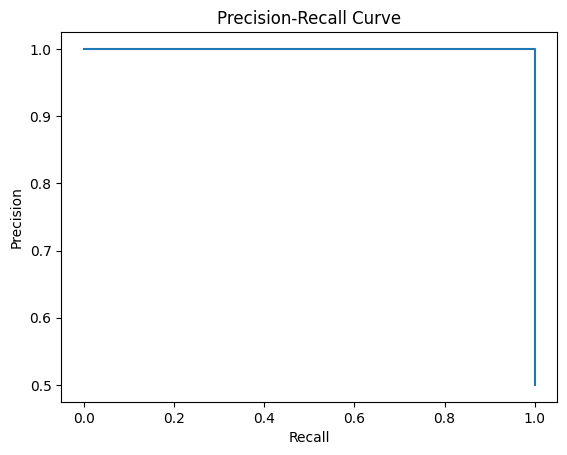

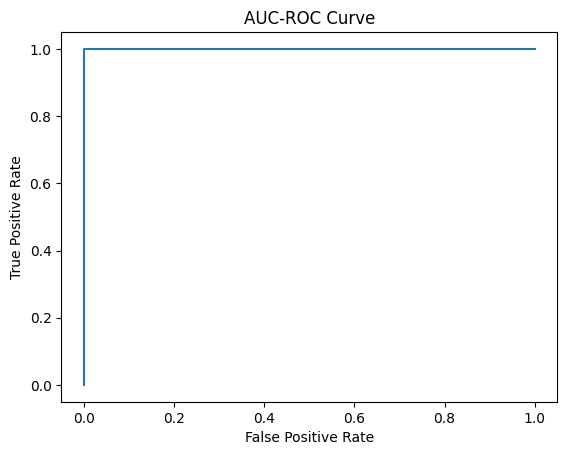

[[10  0]
 [ 0 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [18]:
# Train a Naive Bayes classifier on the data using Scikit-learn
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X = df.drop("target_score", axis=1)
y = df["target_score"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5, stratify=y)

# Train the classifier
clf = GaussianNB()
clf.fit(X_train, y_train)

# Test the classifier
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Display Precision-Recall Curve, AUC-ROC curve and Confusion Matrix
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

# AUC-ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC-ROC Curve")
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

report  = classification_report(y_test, y_pred)
print(report)

Accuracy: 1.0


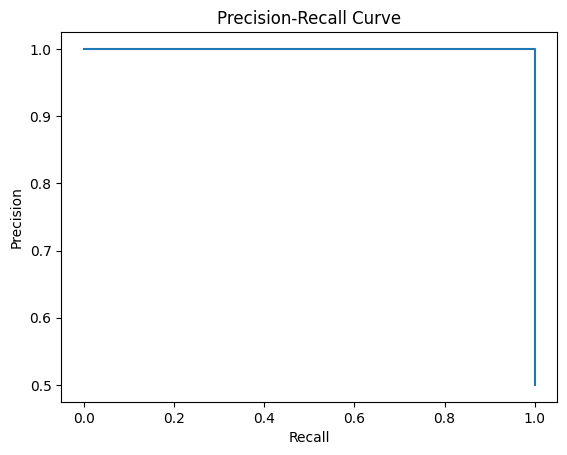

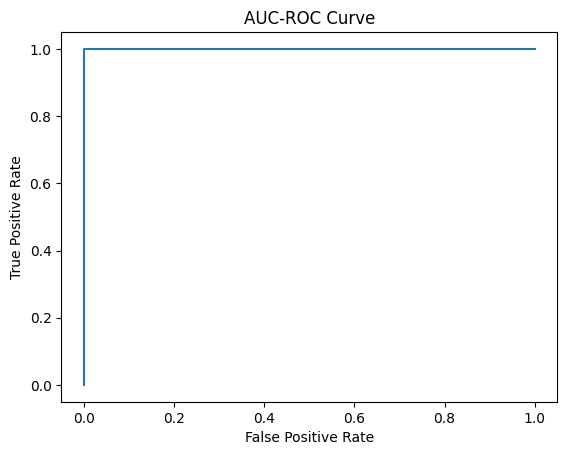

[[10  0]
 [ 0 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [19]:
# Train a Logistic Regression classifier on the data using Scikit-learn
from sklearn.linear_model import LogisticRegression

# Train the classifier
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Test the classifier
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Display Precision-Recall Curve, AUC-ROC curve and Confusion Matrix
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

# AUC-ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC-ROC Curve")
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

report  = classification_report(y_test, y_pred)
print(report)

Accuracy: 1.0


/Users/aarshpatel/Desktop/Project/.venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


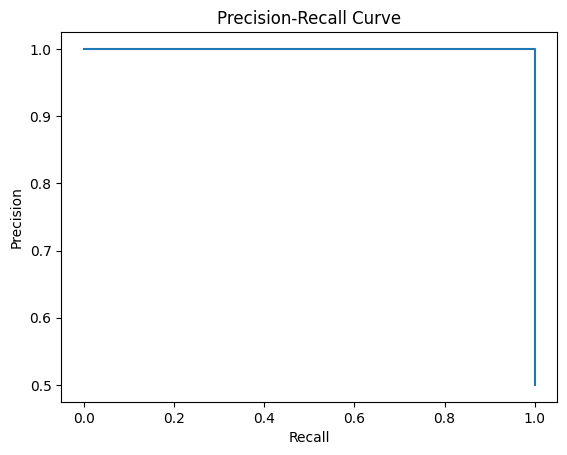

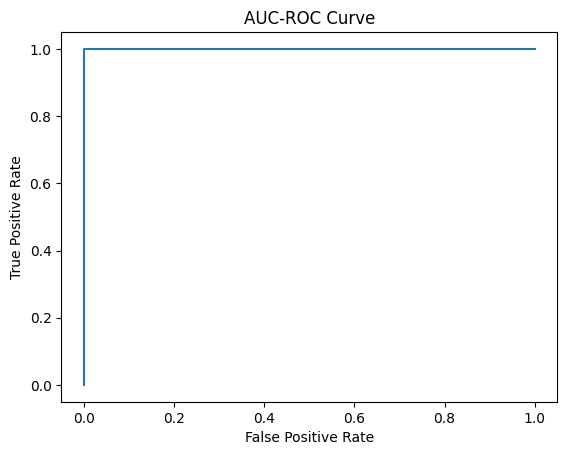

[[10  0]
 [ 0 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [20]:
# Train a Multi-layer Perceptron classifier on the data using Scikit-learn
from sklearn.neural_network import MLPClassifier

# Train the classifier
clf = MLPClassifier()
clf.fit(X_train, y_train)

# Test the classifier
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Display Precision-Recall Curve, AUC-ROC curve and Confusion Matrix
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

# AUC-ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC-ROC Curve")
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

report  = classification_report(y_test, y_pred)
print(report)